In [1]:
import re
import io
import json
import requests
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
from multiprocessing import Pool
from IPython.display import display

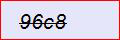

'ASP.NET_SessionId=ktomwi12m32goeh2e0paafeh'

In [2]:
s = requests.Session()
url = "https://www.gturesults.in/Handler.ashx"
r = s.get(url)
display(Image.open(io.BytesIO(r.content)))
re.search(r'ASP.NET_SessionId=[^;]+', r.headers['Set-Cookie']).group()

In [3]:
c = "96c8"

In [4]:
url = "https://www.gturesults.in/"

headers = {
    "Host": "www.gturesults.in",
    "Content-Length": "10070",
    "Cache-Control": "max-age=0",
    "Sec-Ch-Ua": "\"Not A(Brand\";v=\"24\", \"Chromium\";v=\"110\"",
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": "\"Windows\"",
    "Upgrade-Insecure-Requests": "1",
    "Origin": "https://www.gturesults.in",
    "Content-Type": "application/x-www-form-urlencoded",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.78 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.gturesults.in/",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Cookie": re.search(r'ASP.NET_SessionId=[^;]+', r.headers['Set-Cookie']).group()
}

kitoptions = {
  "enable-local-file-access": None ,
}

In [5]:
def f1(soup):
    soup2 = BeautifulSoup(str(soup.findAll(class_="Search")[0]), 'html.parser')
    tr = soup2.findAll('tr')[2]
    data = {}
    for td in tr.find_all('td'):
        if td.has_attr('class') and td['class'][0] == 'tdodd':
            key = td.text.strip()
        else:
            value = td.find('span').text.strip()
            data[key] = value
    soup = BeautifulSoup(str(soup.findAll(class_="Search")[1]), 'html.parser')
    table = soup.find('table')
    header_map = {'Name': 'lblName', 'Enrollment No.': 'lblEnrollmentNo', 'Exam Seat No.': 'lblExam', 'Declared On': 'lblDeclaredOn', 'Exam': 'lblExamName', 'Branch': 'lblBranchName'}
    result = {}
    for header, id_attr in header_map.items():
        span = table.find('span', {'id': id_attr})
        result[header] = span.text.strip()
    data.update(result)
    return data

def f2(soup):
    table = soup.findAll(class_='Rgrid')[2]
    rows = table.find_all('tr')
    data = {}
    for row in rows:
        cells = row.find_all('td')
        for cell in cells:
            key = cell.text.strip().split(':')[0]
            value = cell.find('span', {'class': 'csstotal'}).text.strip()
            data[key] = value
    table = soup.find('table', {'id': 'tbl100pt'})
    for tr in table.find_all('tr'):
        tds = tr.find_all('td')
        if len(tds) == 3:
            data['current_points'] = tds[1].find('span').get_text().strip()
            data['cumulative_points'] = tds[2].find('span').get_text().strip()
    return data

def vtodur(enr):
    payload = f"__EVENTTARGET=&__EVENTARGUMENT=&__VIEWSTATE=%2FwEPDwUKLTQ2MTAzMzcxNQ9kFgICAw9kFgwCAQ8WAh4EVGV4dAWTASA8YSBzdHlsZT0iY29sb3I6IGdyYXk7IGZvbnQtc2l6ZTogMTBweDsiIGhyZWY9IkRlZmF1bHQuYXNweD9leHQ9YXJjaGl2ZSI%2BQXJjaGl2ZTwvYT4gIHwgQ3VycmVudCA8c3BhbiBzdHlsZT0iY29sb3I6IG1hcm9vbjsiPiBbV2ludGVyIDIwMjJdPC9zcGFuPmQCAw8PFgIeB1Zpc2libGVoZGQCBQ8WAh8BaGQCBw8PFgIfAAULV2ludGVyIDIwMjJkZAIJDxBkZBYAZAILDxAPFgYeDkRhdGFHcm91cEZpZWxkBQZCUkFOQ0geDURhdGFUZXh0RmllbGQFBUVYQU1OHg5EYXRhVmFsdWVGaWVsZAUGRVhBTUlEZDK%2FNgABAAAA%2F%2F%2F%2F%2FwEAAAAAAAAADAIAAABBT3B0aW9uQ3RybCwgVmVyc2lvbj0xLjAuMC4wLCBDdWx0dXJlPW5ldXRyYWwsIFB1YmxpY0tleVRva2VuPW51bGwFAQAAAB5WaWtTZXJ2ZXJDb250cm9sLk9wdGlvblRyaXBsZXQEAAAABUZpcnN0BlNlY29uZAVUaGlyZAZGb3VydGgCAgICAgAAAAgITAAAAAkDAAAACQQAAAAJBQAAABEDAAAATAAAAAYGAAAAJC4uLi4uQkEgU0VNIDEwIC0gUmVtZWRpYWwgKERFQyAyMDIyKQYHAAAAIi4uLi4uQkEgU0VNIDcgLSBSZWd1bGFyIChERUMgMjAyMikGCAAAACMuLi4uLkJBIFNFTSA4IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYJAAAAIy4uLi4uQkUgU0VNIDYgLSBSZW1lZGlhbCAoREVDIDIwMjIpBgoAAAAiLi4uLi5CRSBTRU0gNyAtIFJlZ3VsYXIgKERFQyAyMDIyKQYLAAAAIy4uLi4uQkUgU0VNIDcgLSBSZW1lZGlhbCAoREVDIDIwMjIpBgwAAAAjLi4uLi5CRSBTRU0gOCAtIFJlbWVkaWFsIChERUMgMjAyMikGDQAAACMuLi4uLkJIIFNFTSA2IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYOAAAAIi4uLi4uQkggU0VNIDcgLSBSZWd1bGFyIChERUMgMjAyMikGDwAAACMuLi4uLkJIIFNFTSA3IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYQAAAAIy4uLi4uQlBIIFNFTSA1IC0gUmVndWxhciAoREVDIDIwMjIpBhEAAAAkLi4uLi5CUEggU0VNIDUgLSBSZW1lZGlhbCAoREVDIDIwMjIpBhIAAAAkLi4uLi5CUEggU0VNIDYgLSBSZW1lZGlhbCAoREVDIDIwMjIpBhMAAAAjLi4uLi5CUEggU0VNIDcgLSBSZWd1bGFyIChERUMgMjAyMikGFAAAACQuLi4uLkJQSCBTRU0gNyAtIFJlbWVkaWFsIChERUMgMjAyMikGFQAAACQuLi4uLkJQSCBTRU0gOCAtIFJlbWVkaWFsIChERUMgMjAyMikGFgAAACMuLi4uLkRBIFNFTSA2IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYXAAAAIi4uLi4uREIgU0VNIDEgLSBSZWd1bGFyIChERUMgMjAyMikGGAAAACQuLi4uLkRJUEwgU0VNIDUgLSBSZWd1bGFyIChERUMgMjAyMikGGQAAACUuLi4uLkRJUEwgU0VNIDUgLSBSZW1lZGlhbCAoREVDIDIwMjIpBhoAAAAlLi4uLi5ESVBMIFNFTSA2IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYbAAAAJC4uLi4uRElQTCBTRU0gNyAtIFJlZ3VsYXIgKERFQyAyMDIyKQYcAAAAJS4uLi4uRElQTCBTRU0gNyAtIFJlbWVkaWFsIChERUMgMjAyMikGHQAAACUuLi4uLkRJUEwgU0VNIDggLSBSZW1lZGlhbCAoREVDIDIwMjIpBh4AAAAjLi4uLi5EViBTRU0gNCAtIFJlbWVkaWFsIChERUMgMjAyMikGHwAAACIuLi4uLkRWIFNFTSA1IC0gUmVndWxhciAoREVDIDIwMjIpBiAAAAAjLi4uLi5EViBTRU0gNSAtIFJlbWVkaWFsIChERUMgMjAyMikGIQAAACMuLi4uLkRWIFNFTSA2IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYiAAAAKS4uLi4uUGhhcm0uRCBZZWFyIDIgLSBSZW1lZGlhbCAoREVDIDIwMjIpBiMAAAApLi4uLi5QaGFybS5EIFllYXIgMyAtIFJlbWVkaWFsIChERUMgMjAyMikGJAAAACkuLi4uLlBoYXJtLkQgWWVhciA0IC0gUmVtZWRpYWwgKERFQyAyMDIyKQYlAAAAKS4uLi4uUGhhcm0uRCBZZWFyIDUgLSBSZW1lZGlhbCAoREVDIDIwMjIpBiYAAAAiLi4uLi5JQiBTRU0gMyAtIFJlZ3VsYXIgKERFQyAyMDIyKQYnAAAAJC4uLi4uSUMgU0VNIDEwIC0gUmVtZWRpYWwgKERFQyAyMDIyKQYoAAAAIy4uLi4uSUMgU0VNIDYgLSBSZW1lZGlhbCAoREVDIDIwMjIpBikAAAAiLi4uLi5JQyBTRU0gNyAtIFJlZ3VsYXIgKERFQyAyMDIyKQYqAAAAIy4uLi4uSUMgU0VNIDcgLSBSZW1lZGlhbCAoREVDIDIwMjIpBisAAAAjLi4uLi5JQyBTRU0gOCAtIFJlbWVkaWFsIChERUMgMjAyMikGLAAAACIuLi4uLklDIFNFTSA5IC0gUmVndWxhciAoREVDIDIwMjIpBi0AAAAjLi4uLi5JQyBTRU0gOSAtIFJlbWVkaWFsIChERUMgMjAyMikGLgAAACguLi4uLkJCQShBTSkgU0VNIDYgLSBSZW1lZGlhbCAoREVDIDIwMjIpBi8AAAApLi4uLi5NQkEoQU0pICBTRU0gOSAtIFJlbWVkaWFsIChERUMgMjAyMikGMAAAACkuLi4uLk1CQShBTSkgU0VNIDEwIC0gUmVtZWRpYWwgKERFQyAyMDIyKQYxAAAAJy4uLi4uTUJBKEFNKSBTRU0gNyAtIFJlZ3VsYXIgKERFQyAyMDIyKQYyAAAAKC4uLi4uTUJBKEFNKSBTRU0gNyAtIFJlbWVkaWFsIChERUMgMjAyMikGMwAAACguLi4uLk1CQShBTSkgU0VNIDggLSBSZW1lZGlhbCAoREVDIDIwMjIpBjQAAAAnLi4uLi5NQkEoQU0pIFNFTSA5IC0gUmVndWxhciAoREVDIDIwMjIpBjUAAAAkLi4uLi5NQkEgU0VNIDIgLSBSZW1lZGlhbCAoREVDIDIwMjIpBjYAAAAkLi4uLi5NQkEgU0VNIDQgLSBSZW1lZGlhbCAoREVDIDIwMjIpBjcAAAAwLi4uLi5NQkEgKFBBUlQgVElNRSkgU0VNIDIgLSBSZW1lZGlhbCAoREVDIDIwMjIpBjgAAAAvLi4uLi5NQkEgKFBBUlQgVElNRSkgU0VNIDMgLSBSZWd1bGFyIChERUMgMjAyMikGOQAAADAuLi4uLk1CQSAoUEFSVCBUSU1FKSBTRU0gMyAtIFJlbWVkaWFsIChERUMgMjAyMikGOgAAADAuLi4uLk1CQSAoUEFSVCBUSU1FKSBTRU0gNCAtIFJlbWVkaWFsIChERUMgMjAyMikGOwAAAC8uLi4uLk1CQSAoUEFSVCBUSU1FKSBTRU0gNSAtIFJlZ3VsYXIgKERFQyAyMDIyKQY8AAAAMC4uLi4uTUJBIChQQVJUIFRJTUUpIFNFTSA2IC0gUmVtZWRpYWwgKERFQyAyMDIyKQY9AAAAJC4uLi4uTUNBIFNFTSAyIC0gUmVtZWRpYWwgKERFQyAyMDIyKQY%2BAAAAIy4uLi4uTUNBIFNFTSAzIC0gUmVndWxhciAoREVDIDIwMjIpBj8AAAAkLi4uLi5NQ0EgU0VNIDMgLSBSZW1lZGlhbCAoREVDIDIwMjIpBkAAAAAkLi4uLi5NQ0EgU0VNIDQgLSBSZW1lZGlhbCAoREVDIDIwMjIpBkEAAAAjLi4uLi5NQ0EgU0VNIDUgLSBSZWd1bGFyIChERUMgMjAyMikGQgAAACQuLi4uLk1DQSBTRU0gNSAtIFJlbWVkaWFsIChERUMgMjAyMikGQwAAACMuLi4uLk1FIFNFTSAyIC0gUmVtZWRpYWwgKERFQyAyMDIyKQZEAAAAIi4uLi4uTUUgU0VNIDMgLSBSZWd1bGFyIChERUMgMjAyMikGRQAAACMuLi4uLk1FIFNFTSAzIC0gUmVtZWRpYWwgKERFQyAyMDIyKQZGAAAAIi4uLi4uTUUgU0VNIDQgLSBSZWd1bGFyIChERUMgMjAyMikGRwAAACMuLi4uLk1FIFNFTSA0IC0gUmVtZWRpYWwgKERFQyAyMDIyKQZIAAAAIi4uLi4uTUggU0VNIDEgLSBSZWd1bGFyIChERUMgMjAyMikGSQAAACQuLi4uLk1QSCBTRU0gMiAtIFJlbWVkaWFsIChERUMgMjAyMikGSgAAACMuLi4uLk1QSCBTRU0gMyAtIFJlZ3VsYXIgKERFQyAyMDIyKQZLAAAAJC4uLi4uTVBIIFNFTSAzIC0gUmVtZWRpYWwgKERFQyAyMDIyKQZMAAAAIy4uLi4uTVBIIFNFTSA0IC0gUmVndWxhciAoREVDIDIwMjIpBk0AAAAkLi4uLi5NUEggU0VNIDQgLSBSZW1lZGlhbCAoREVDIDIwMjIpBk4AAAAiLi4uLi5NUiBTRU0gMyAtIFJlZ3VsYXIgKERFQyAyMDIyKQZPAAAAGC4uLi4uUGhhcm0uRC4oUEIpIFllYXIgMQZQAAAAGC4uLi4uUGhhcm0uRC4oUEIpIFllYXIgMgZRAAAAJS4uLi4uUEREQyBTRU0gOCAtIFJlbWVkaWFsIChERUMgMjAyMikRBAAAAEwAAAAGUgAAAB8zNTAyJFcyMDIyJDIwMjMtMDItMDEkY3VycmVudCQwBlMAAAAfMzU0NiRXMjAyMiQyMDIzLTAzLTEzJGN1cnJlbnQkMAZUAAAAHzM1MjQkVzIwMjIkMjAyMy0wMy0wNiRjdXJyZW50JDAGVQAAAB8zNTQzJFcyMDIyJDIwMjMtMDMtMTAkY3VycmVudCQwBlYAAAAfMzU3NiRXMjAyMiQyMDIzLTA0LTAzJGN1cnJlbnQkMAZXAAAAHzM1NzUkVzIwMjIkMjAyMy0wNC0wMyRjdXJyZW50JDAGWAAAAB8zNTEyJFcyMDIyJDIwMjMtMDItMTYkY3VycmVudCQwBlkAAAAfMzU2NiRXMjAyMiQyMDIzLTAzLTI3JGN1cnJlbnQkMAZaAAAAHzM1NjUkVzIwMjIkMjAyMy0wMy0yNCRjdXJyZW50JDAGWwAAAB8zNTY0JFcyMDIyJDIwMjMtMDMtMjQkY3VycmVudCQwBlwAAAAfMzU1OCRXMjAyMiQyMDIzLTAzLTIxJGN1cnJlbnQkMAZdAAAAHzM1NTckVzIwMjIkMjAyMy0wMy0yMSRjdXJyZW50JDAGXgAAAB8zNTUyJFcyMDIyJDIwMjMtMDMtMTckY3VycmVudCQwBl8AAAAfMzU1MCRXMjAyMiQyMDIzLTAzLTE0JGN1cnJlbnQkMAZgAAAAHzM1NDkkVzIwMjIkMjAyMy0wMy0xNCRjdXJyZW50JDAGYQAAAB8zNTE1JFcyMDIyJDIwMjMtMDItMjMkY3VycmVudCQwBmIAAAAfMzU2MSRXMjAyMiQyMDIzLTAzLTI0JGN1cnJlbnQkMAZjAAAAHzM1NjkkVzIwMjIkMjAyMy0wNC0wMiRjdXJyZW50JDAGZAAAAB8zNTYwJFcyMDIyJDIwMjMtMDQtMDQkY3VycmVudCQwBmUAAAAfMzU1OSRXMjAyMiQyMDIzLTA0LTAzJGN1cnJlbnQkMAZmAAAAHzM1NDUkVzIwMjIkMjAyMy0wMy0xMCRjdXJyZW50JDAGZwAAAB8zNTM3JFcyMDIyJDIwMjMtMDMtMTAkY3VycmVudCQwBmgAAAAfMzUzNiRXMjAyMiQyMDIzLTAzLTEwJGN1cnJlbnQkMAZpAAAAHzM1MDEkVzIwMjIkMjAyMy0wMS0zMSRjdXJyZW50JDAGagAAAB8zNTc0JFcyMDIyJDIwMjMtMDQtMDMkY3VycmVudCQwBmsAAAAfMzU0MiRXMjAyMiQyMDIzLTAzLTEwJGN1cnJlbnQkMAZsAAAAHzM1NDEkVzIwMjIkMjAyMy0wMy0xMCRjdXJyZW50JDAGbQAAAB8zNTEzJFcyMDIyJDIwMjMtMDItMTYkY3VycmVudCQwBm4AAAAfMzU1MSRXMjAyMiQyMDIzLTAzLTE2JGN1cnJlbnQkMAZvAAAAHzM1NDgkVzIwMjIkMjAyMy0wMy0xMyRjdXJyZW50JDAGcAAAAB8zNTQ3JFcyMDIyJDIwMjMtMDMtMTMkY3VycmVudCQwBnEAAAAfMzUyMyRXMjAyMiQyMDIzLTAzLTAzJGN1cnJlbnQkMAZyAAAAHzM1MzQkVzIwMjIkMjAyMy0wMy0wOSRjdXJyZW50JDAGcwAAAB8zNTM4JFcyMDIyJDIwMjMtMDMtMTAkY3VycmVudCQwBnQAAAAfMzU3MyRXMjAyMiQyMDIzLTA0LTAzJGN1cnJlbnQkMAZ1AAAAHzM1NzIkVzIwMjIkMjAyMy0wNC0wMyRjdXJyZW50JDAGdgAAAB8zNTcxJFcyMDIyJDIwMjMtMDQtMDMkY3VycmVudCQwBncAAAAfMzU2NyRXMjAyMiQyMDIzLTA0LTAxJGN1cnJlbnQkMAZ4AAAAHzM1NDAkVzIwMjIkMjAyMy0wMy0xMCRjdXJyZW50JDAGeQAAAB8zNTM5JFcyMDIyJDIwMjMtMDMtMTAkY3VycmVudCQwBnoAAAAfMzUyMiRXMjAyMiQyMDIzLTAzLTAzJGN1cnJlbnQkMAZ7AAAAHzM1MTckVzIwMjIkMjAyMy0wMi0yOCRjdXJyZW50JDAGfAAAAB8zNTAzJFcyMDIyJDIwMjMtMDItMDYkY3VycmVudCQwBn0AAAAfMzUyMSRXMjAyMiQyMDIzLTAzLTAzJGN1cnJlbnQkMAZ%2BAAAAHzM1MjAkVzIwMjIkMjAyMy0wMy0wMiRjdXJyZW50JDAGfwAAAB8zNTE5JFcyMDIyJDIwMjMtMDMtMDEkY3VycmVudCQwBoAAAAAfMzUxOCRXMjAyMiQyMDIzLTAyLTI4JGN1cnJlbnQkMAaBAAAAHzM1NTMkVzIwMjIkMjAyMy0wMy0yMCRjdXJyZW50JDAGggAAAB8zNTQ0JFcyMDIyJDIwMjMtMDMtMTAkY3VycmVudCQwBoMAAAAfMzU3MCRXMjAyMiQyMDIzLTA0LTAzJGN1cnJlbnQkMAaEAAAAHzM1NjMkVzIwMjIkMjAyMy0wMy0yMyRjdXJyZW50JDAGhQAAAB8zNTYyJFcyMDIyJDIwMjMtMDMtMjMkY3VycmVudCQwBoYAAAAfMzU1NiRXMjAyMiQyMDIzLTAzLTIwJGN1cnJlbnQkMAaHAAAAHzM1NTUkVzIwMjIkMjAyMy0wMy0yMCRjdXJyZW50JDAGiAAAAB8zNTMzJFcyMDIyJDIwMjMtMDMtMDkkY3VycmVudCQwBokAAAAfMzUzMCRXMjAyMiQyMDIzLTAzLTA3JGN1cnJlbnQkMAaKAAAAHzM1MjkkVzIwMjIkMjAyMy0wMy0wNyRjdXJyZW50JDAGiwAAAB8zNTI4JFcyMDIyJDIwMjMtMDMtMDckY3VycmVudCQwBowAAAAfMzUyNyRXMjAyMiQyMDIzLTAzLTA3JGN1cnJlbnQkMAaNAAAAHzM1MjYkVzIwMjIkMjAyMy0wMy0wNyRjdXJyZW50JDAGjgAAAB8zNTI1JFcyMDIyJDIwMjMtMDMtMDckY3VycmVudCQwBo8AAAAfMzUzNSRXMjAyMiQyMDIzLTAzLTEwJGN1cnJlbnQkMAaQAAAAHzM1MDkkVzIwMjIkMjAyMy0wMi0xNiRjdXJyZW50JDAGkQAAAB8zNTA4JFcyMDIyJDIwMjMtMDItMTYkY3VycmVudCQwBpIAAAAfMzUwNyRXMjAyMiQyMDIzLTAyLTA3JGN1cnJlbnQkMAaTAAAAHzM1MDYkVzIwMjIkMjAyMy0wMi0wNyRjdXJyZW50JDAGlAAAAB8zNTY4JFcyMDIyJDIwMjMtMDQtMDEkY3VycmVudCQwBpUAAAAfMzUxNCRXMjAyMiQyMDIzLTAyLTIyJGN1cnJlbnQkMAaWAAAAHzM1MTEkVzIwMjIkMjAyMy0wMi0xNiRjdXJyZW50JDAGlwAAAB8zNTEwJFcyMDIyJDIwMjMtMDItMTYkY3VycmVudCQwBpgAAAAfMzUwNSRXMjAyMiQyMDIzLTAyLTA3JGN1cnJlbnQkMAaZAAAAHzM1MDQkVzIwMjIkMjAyMy0wMi0wNyRjdXJyZW50JDAGmgAAAB8zNTE2JFcyMDIyJDIwMjMtMDItMjgkY3VycmVudCQwBpsAAAAfMzUzMiRXMjAyMiQyMDIzLTAzLTA5JGN1cnJlbnQkMAacAAAAHzM1MzEkVzIwMjIkMjAyMy0wMy0wNyRjdXJyZW50JDAGnQAAAB8zNTU0JFcyMDIyJDIwMjMtMDMtMjAkY3VycmVudCQwEQUAAABMAAAABp4AAAACQkEGnwAAAAJCQQagAAAAAkJBBqEAAAACQkUGogAAAAJCRQajAAAAAkJFBqQAAAACQkUGpQAAAAJCSAamAAAAAkJIBqcAAAACQkgGqAAAAANCUEgGqQAAAANCUEgGqgAAAANCUEgGqwAAAANCUEgGrAAAAANCUEgGrQAAAANCUEgGrgAAAAJEQQavAAAAAkRCBrAAAAAERElQTAaxAAAABERJUEwGsgAAAARESVBMBrMAAAAERElQTAa0AAAABERJUEwGtQAAAARESVBMBrYAAAACRFYGtwAAAAJEVga4AAAAAkRWBrkAAAACRFYGugAAAAJGRAa7AAAAAkZEBrwAAAACRkQGvQAAAAJGRAa%2BAAAAAklCBr8AAAACSUMGwAAAAAJJQwbBAAAAAklDBsIAAAACSUMGwwAAAAJJQwbEAAAAAklDBsUAAAACSUMGxgAAAANNQU0GxwAAAANNQU0GyAAAAANNQU0GyQAAAANNQU0GygAAAANNQU0GywAAAANNQU0GzAAAAANNQU0GzQAAAANNQkEGzgAAAANNQkEGzwAAAAxNQkEtUEFSVFRJTUUG0AAAAAxNQkEtUEFSVFRJTUUG0QAAAAxNQkEtUEFSVFRJTUUG0gAAAAxNQkEtUEFSVFRJTUUG0wAAAAxNQkEtUEFSVFRJTUUG1AAAAAxNQkEtUEFSVFRJTUUG1QAAAANNQ0EG1gAAAANNQ0EG1wAAAANNQ0EG2AAAAANNQ0EG2QAAAANNQ0EG2gAAAANNQ0EG2wAAAAJNRQbcAAAAAk1FBt0AAAACTUUG3gAAAAJNRQbfAAAAAk1FBuAAAAACTUgG4QAAAANNUEgG4gAAAANNUEgG4wAAAANNUEgG5AAAAANNUEgG5QAAAANNUEgG5gAAAAJNUgbnAAAAAlBCBugAAAACUEIG6QAAAARQRERDC2RkGAEFHl9fQ29udHJvbHNSZXF1aXJlUG9zdEJhY2tLZXlfXxYBBQZpbWdyZWZKYc70eHEZ72616cOOHotcL%2BGDAPa93Xpmn0sPdAUXQQ%3D%3D&__VIEWSTATEGENERATOR=CA0B0334&ddlbatch=3576%24W2022%242023-04-03%24current%240&txtenroll={enr}&txtSheetNo=&CodeNumberTextBox={c}&btnSearch=Search"
    res = requests.request("POST", url, data=payload, headers=headers).text
    soup = BeautifulSoup(res, 'html.parser')
    d1 = f1(soup)
    if d1['Exam'] == '------------' : 
        return vtodur(enr)
    if d1['Name'] == '------------':
        d3 = {'Enrollment No.': enr}
        d3['Message'] = soup.find(id='lblmsg').text
        return d3
    d2 = f2(soup)
    d1.update(d2)
    d1['Message'] = soup.find(id='lblmsg').text
    return d1

with Pool(5) as pp:
  dd = pp.map(vtodur,range(190280111001,190280111160))

df = pd.DataFrame(dd)
df = df.apply(pd.to_numeric, errors= 'ignore' )
df.to_excel("op.xlsx")

👈 download <font color='yellow'>op.xlsx</font> from left side bar by double clicking it